# 2. Consuming data using Kafka (10%)

## 2.1 Memory Event Consumer (5%)

### Memory consumer code

<IPython.core.display.Javascript object>


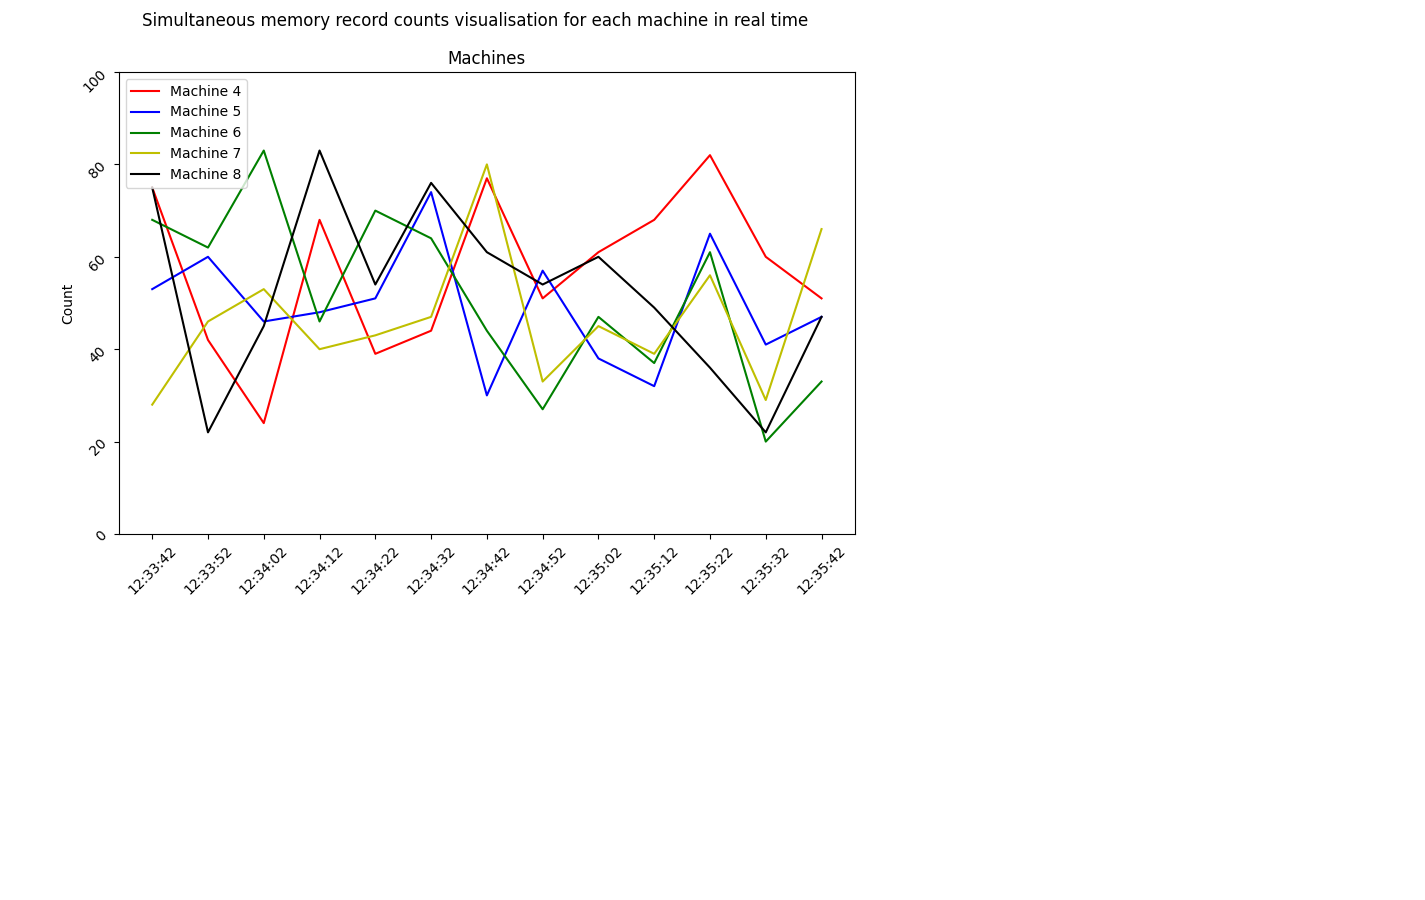

KeyboardInterrupt: 

In [1]:
# import statements
from kafka import KafkaConsumer
import datetime as dt
from json import loads
import statistics
import matplotlib.pyplot as plt
import statistics

from pytz import timezone


%matplotlib notebook

topic = 'Streaming_Linux_memory'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   
                                   auto_offset_reset='latest', 
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer



def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Count')
        fig.suptitle('Simultaneous memory record counts visualisation for each machine in real time') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax1):
    try:

        x1, y1, y2, y3, y4, y5 = [], [], [], [], [], []

        for message in consumer:
            
            # print(message)
            count1 = 0
            count2 = 0
            count3 = 0
            count4 = 0
            count5 = 0

            for i in message.value:
            
                if i['machine'] == '4':
                    count1+=1
            
                if i['machine'] == '5':
                    count2+=1
                    
                if i['machine'] == '6':
                    count3+=1
            
                if i['machine'] == '7':
                    count4+=1
                       
                if i['machine'] == '8':
                    count5+=1
                            
            x1.append(dt.datetime.now(timezone('UTC')).strftime('%H:%M:%S'))
            y1.append(count1)
            y2.append(count2)
            y3.append(count3)
            y4.append(count4)
            y5.append(count5)
            
            # we start plotting only when we have 12 data points
            if len(x1) > 12:   
                ax1.clear()
                ax1.plot(x1, y1, color='r',label="Machine 4")
                ax1.plot(x1, y2, color='b',label="Machine 5")
                ax1.plot(x1, y3, color='g',label="Machine 6")
                ax1.plot(x1, y4, color='y',label="Machine 7")
                ax1.plot(x1, y5, color='black',label="Machine 8")
                ax1.legend(loc="upper left")
                ax1.set_title("Machines")
                ax1.set_xlabel("Time(sec)")
                ax1.set_ylabel("Count")
                ax1.set_yticks([0,20,40,60,80,100])
                ax1.tick_params(labelrotation=45)
                fig.canvas.draw()
                x1.pop(0) 
                y1.pop(0)
                y2.pop(0) 
                y3.pop(0) 
                y4.pop(0) 
                y5.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax1 = init_plots()
    consume_messages(consumer, fig, ax1)
    